In [6]:
from ucimlrepo import fetch_ucirepo 
  
default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
X = default_of_credit_card_clients.data.features 

X.columns = [
    "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE",
    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
]

y = default_of_credit_card_clients.data.targets 
  
print(default_of_credit_card_clients.metadata) 
  
print(default_of_credit_card_clients.variables) 


{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 365, 'type': 'NATIVE', 'title': 'The comparisons of data mining techniques for the predictive accuracy of 

Separating data:

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

y = y.squeeze()  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

cat_features = [
    "SEX", "EDUCATION", "MARRIAGE",
    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"
]

First model (depth = 6):

In [ ]:
from catboost import CatBoostClassifier, Pool

train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, y_test, cat_features=cat_features)

model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    cat_features=cat_features,
    random_seed=42,
    verbose=100
)
model.fit(train_pool, eval_set=test_pool, use_best_model=True)

0:	test: 0.7447809	best: 0.7447809 (0)	total: 78.5ms	remaining: 39.2s
100:	test: 0.7749491	best: 0.7749491 (100)	total: 1.97s	remaining: 7.77s
200:	test: 0.7784187	best: 0.7784187 (200)	total: 4.02s	remaining: 5.97s
300:	test: 0.7788221	best: 0.7792011 (287)	total: 6.12s	remaining: 4.05s
400:	test: 0.7790149	best: 0.7792189 (373)	total: 8.32s	remaining: 2.05s
499:	test: 0.7791973	best: 0.7792576 (467)	total: 10.1s	remaining: 0us

bestTest = 0.7792576476
bestIteration = 467

Shrink model to first 468 iterations.


Second model (depth = 7):

In [ ]:
model_2 = CatBoostClassifier(
    iterations=500,
    learning_rate=0.03,
    depth=7,
    eval_metric='AUC',
    cat_features=cat_features,
    random_seed=42,
    verbose=100
)
model_2.fit(train_pool, eval_set=test_pool, use_best_model=True)

0:	test: 0.7443817	best: 0.7443817 (0)	total: 43ms	remaining: 21.4s
100:	test: 0.7730173	best: 0.7730173 (100)	total: 2.63s	remaining: 10.4s
200:	test: 0.7779794	best: 0.7779794 (200)	total: 5.35s	remaining: 7.96s
300:	test: 0.7792979	best: 0.7792979 (300)	total: 8.04s	remaining: 5.32s
400:	test: 0.7806804	best: 0.7806804 (400)	total: 10.4s	remaining: 2.56s
499:	test: 0.7807875	best: 0.7808822 (489)	total: 12.2s	remaining: 0us

bestTest = 0.7808822057
bestIteration = 489

Shrink model to first 490 iterations.


In [10]:
model_3 = CatBoostClassifier(
    iterations=500,
    learning_rate=0.025,
    depth=8,
    eval_metric='AUC',
    cat_features=cat_features,
    random_seed=42,
    verbose=100
)
model_3.fit(train_pool, eval_set=test_pool, use_best_model=True)

0:	test: 0.7480593	best: 0.7480593 (0)	total: 58.4ms	remaining: 29.1s
100:	test: 0.7724476	best: 0.7724476 (100)	total: 3.47s	remaining: 13.7s
200:	test: 0.7776681	best: 0.7776681 (200)	total: 7.06s	remaining: 10.5s
300:	test: 0.7796695	best: 0.7797021 (298)	total: 10.4s	remaining: 6.9s
400:	test: 0.7801064	best: 0.7801744 (363)	total: 13s	remaining: 3.2s
499:	test: 0.7801272	best: 0.7804639 (469)	total: 15.7s	remaining: 0us

bestTest = 0.7804638908
bestIteration = 469

Shrink model to first 470 iterations.


Visualization of the trees 0, 20 and 400:

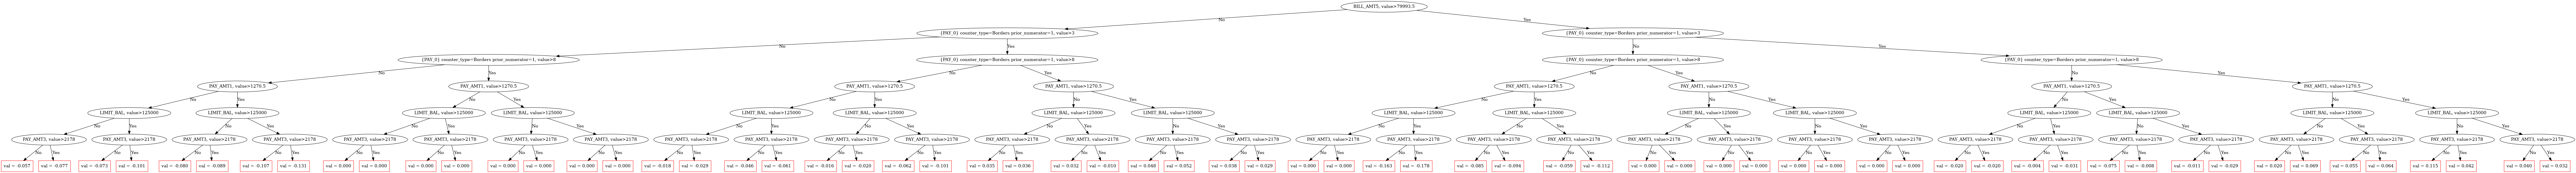

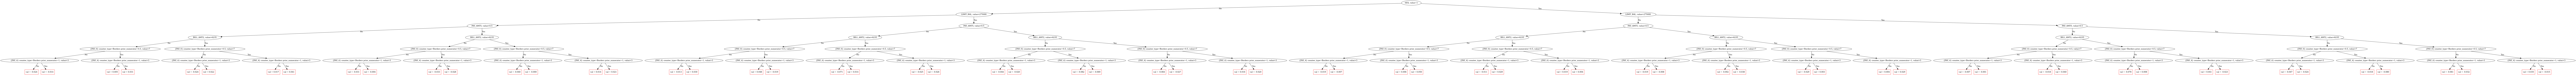

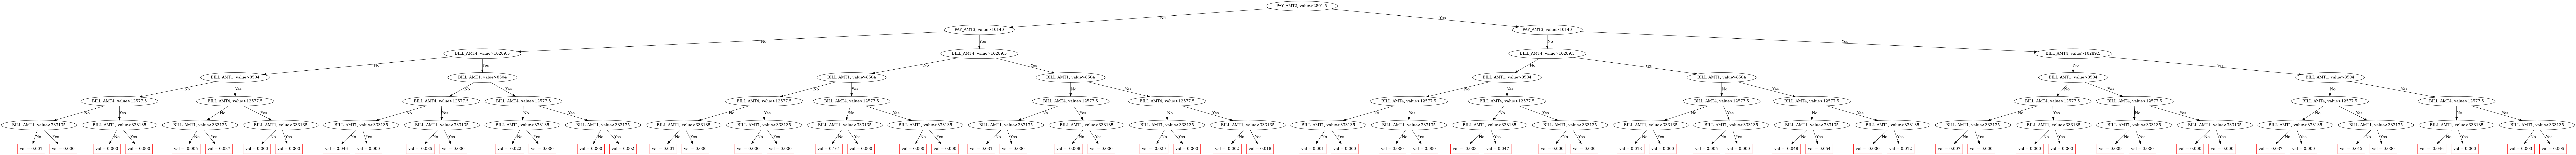

In [24]:
from IPython.display import Image, display
import matplotlib.pyplot as plt

idxs = [0, 20, 400]

for i, idx in enumerate(idxs):
    graph = model.plot_tree(tree_idx=idx, pool=train_pool)
    
    filename = f'tree_{idx}.png'
    graph.render(filename, format='png')
    
    display(Image(filename=f'{filename}.png'))


Interface to interact with model:

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

SEX = widgets.Dropdown(options=[1, 2], description='SEX:')
EDUCATION = widgets.Dropdown(options=[1, 2, 3, 4], description='EDUCATION:')
MARRIAGE = widgets.Dropdown(options=[1, 2, 3], description='MARRIAGE:')
AGE = widgets.IntSlider(value=30, min=18, max=100, description='AGE:')

LIMIT_BAL = widgets.IntSlider(value=50000, min=0, max=1000000, step=1000, description='LIMIT_BAL:')

PAY_0 = widgets.IntSlider(value=0, min=-2, max=8, description='PAY_0:')
PAY_2 = widgets.IntSlider(value=0, min=-2, max=8, description='PAY_2:')
PAY_3 = widgets.IntSlider(value=0, min=-2, max=8, description='PAY_3:')
PAY_4 = widgets.IntSlider(value=0, min=-2, max=8, description='PAY_4:')
PAY_5 = widgets.IntSlider(value=0, min=-2, max=8, description='PAY_5:')
PAY_6 = widgets.IntSlider(value=0, min=-2, max=8, description='PAY_6:')

BILL_AMT1 = widgets.IntSlider(value=5000, min=0, max=1000000, step=1000, description='BILL_AMT1:')
BILL_AMT2 = widgets.IntSlider(value=5000, min=0, max=1000000, step=1000, description='BILL_AMT2:')
BILL_AMT3 = widgets.IntSlider(value=5000, min=0, max=1000000, step=1000, description='BILL_AMT3:')
BILL_AMT4 = widgets.IntSlider(value=5000, min=0, max=1000000, step=1000, description='BILL_AMT4:')
BILL_AMT5 = widgets.IntSlider(value=5000, min=0, max=1000000, step=1000, description='BILL_AMT5:')
BILL_AMT6 = widgets.IntSlider(value=5000, min=0, max=1000000, step=1000, description='BILL_AMT6:')

PAY_AMT1 = widgets.IntSlider(value=2000, min=0, max=1000000, step=1000, description='PAY_AMT1:')
PAY_AMT2 = widgets.IntSlider(value=2000, min=0, max=1000000, step=1000, description='PAY_AMT2:')
PAY_AMT3 = widgets.IntSlider(value=2000, min=0, max=1000000, step=1000, description='PAY_AMT3:')
PAY_AMT4 = widgets.IntSlider(value=2000, min=0, max=1000000, step=1000, description='PAY_AMT4:')
PAY_AMT5 = widgets.IntSlider(value=2000, min=0, max=1000000, step=1000, description='PAY_AMT5:')
PAY_AMT6 = widgets.IntSlider(value=2000, min=0, max=1000000, step=1000, description='PAY_AMT6:')

button = widgets.Button(description="Predict Default")
output = widgets.Output()

def on_button_clicked(b):
    with output:
        output.clear_output()
        
        data = pd.DataFrame([{
            "LIMIT_BAL": LIMIT_BAL.value,
            "SEX": SEX.value,
            "EDUCATION": EDUCATION.value,
            "MARRIAGE": MARRIAGE.value,
            "AGE": AGE.value,
            "PAY_0": PAY_0.value,
            "PAY_2": PAY_2.value,
            "PAY_3": PAY_3.value,
            "PAY_4": PAY_4.value,
            "PAY_5": PAY_5.value,
            "PAY_6": PAY_6.value,
            "BILL_AMT1": BILL_AMT1.value,
            "BILL_AMT2": BILL_AMT2.value,
            "BILL_AMT3": BILL_AMT3.value,
            "BILL_AMT4": BILL_AMT4.value,
            "BILL_AMT5": BILL_AMT5.value,
            "BILL_AMT6": BILL_AMT6.value,
            "PAY_AMT1": PAY_AMT1.value,
            "PAY_AMT2": PAY_AMT2.value,
            "PAY_AMT3": PAY_AMT3.value,
            "PAY_AMT4": PAY_AMT4.value,
            "PAY_AMT5": PAY_AMT5.value,
            "PAY_AMT6": PAY_AMT6.value
        }])
        
        data_pool = Pool(data, cat_features=cat_features)
        
        pred_class = model.predict(data_pool)[0]
        pred_proba = model.predict_proba(data_pool)[0,1]  
        
        print(f"Prediction: {'Default' if pred_class==1 else 'No Default'}")
        print(f"Confidence (probability of default): {pred_proba:.3f}")

button.on_click(on_button_clicked)

display(widgets.VBox([
    LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE,
    PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6,
    BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6,
    PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6,
    button, output
]))

Saving the best model:

In [25]:
import joblib

model_2.save_model("catboost_credit_model.cbm")